In [74]:
import cv2
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

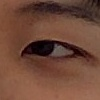

In [75]:
img_dir = "data\\train\\1\\prep_1_frame47.jpg"

Image(filename=img_dir)

(-0.5, 99.5, 99.5, -0.5)

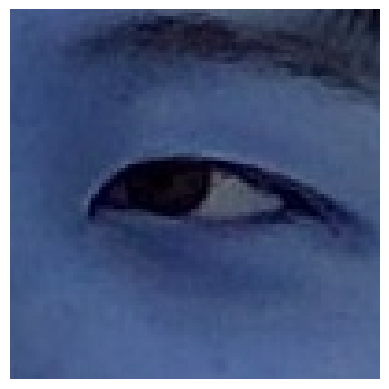

In [76]:
img = cv2.imread(img_dir)

plt.imshow(img)
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

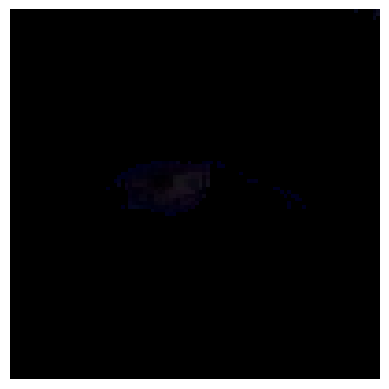

In [78]:
# BGR 이미지를 HSV(Hue, Saturation, Value) 형식으로 변환
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 검정색 범위
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 30])

# 검정색이 아닌 영역을 마스킹
mask = cv2.inRange(hsv, lower_black, upper_black)

# 마스킹된 부분만 남기기
result = cv2.bitwise_and(img, img, mask=mask)

# 결과 이미지 출력
plt.imshow(result)
plt.axis('off')

In [79]:
cv2.imwrite('result_image.jpg', result)

True

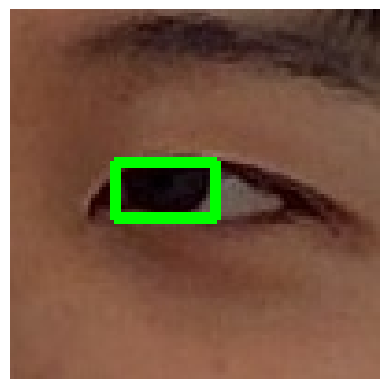

In [81]:
# 마스킹된 부분에서 가장 큰 영역 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)

# 가장 큰 영역에 대한 바운딩 박스 생성
x, y, w, h = cv2.boundingRect(largest_contour)

# 바운딩 박스 그리기
result = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 255, 0), 2)

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)
plt.axis('off')
plt.show()


- 잘 출력되어서 이를 함수화하여 정리합니다.
- 다른 이미지에 대해서 시도해봅니다.

In [98]:
def pupil_bounding(img):
    # BGR 이미지를 HSV(Hue, Saturation, Value) 형식으로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 검정색 범위
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 30])

    # 검정색이 아닌 영역을 마스킹
    mask = cv2.inRange(hsv, lower_black, upper_black)

    # 마스킹된 부분만 남기기
    result = cv2.bitwise_and(img, img, mask=mask)

    # 결과 이미지 출력
    plt.imshow(result)
    plt.axis('off')
    # 마스킹된 부분에서 가장 큰 영역 찾기
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)

    # 가장 큰 영역에 대한 바운딩 박스 생성
    x, y, w, h = cv2.boundingRect(largest_contour)

    # 바운딩 박스 그리기
    result = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 255, 0), 2)

    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    plt.imshow(result_rgb)
    plt.axis('off')
    plt.show()

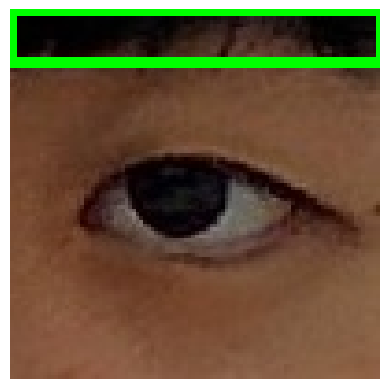

In [103]:
img_dir = "data\\train\\2\\prep_7_frame59.jpg"
img = cv2.imread(img_dir)
pupil_bounding(img)

(-0.5, 99.5, 99.5, -0.5)

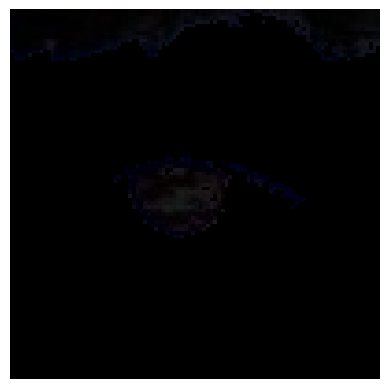

In [104]:
# BGR 이미지를 HSV(Hue, Saturation, Value) 형식으로 변환
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 검정색 범위
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 30])

# 검정색이 아닌 영역을 마스킹
mask = cv2.inRange(hsv, lower_black, upper_black)

# 마스킹된 부분만 남기기
result = cv2.bitwise_and(img, img, mask=mask)

# 결과 이미지 출력
plt.imshow(result)
plt.axis('off')

- 제대로 출력되지 않습니다.
- 아무래도 픽셀의 색을 기반으로 구분하고 이를 바탕으로 성능을 높이고자 시도했기 때문이라고 생각됩니다.
- 검정색 픽셀이 나올 수 있는 (눈썹, 머리카락)을 제외시키기 위해서 위 아래로 25%씩 이미지를 crop하고 진행합니다.

In [100]:
# 이미지의 높이, 너비 가져오기
height, width, _ = img.shape

cropped = img[25:75, 0:width]

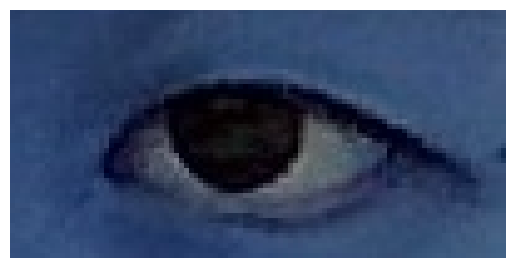

In [101]:
plt.imshow(cropped)
plt.axis('off')
plt.show() # Crop된 이미지 시각화

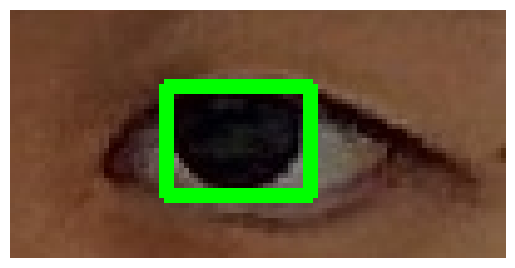

In [102]:
pupil_bounding(cropped)

- 눈의 이미지에서 동공 위치를 잘 잡는 것을 볼 수 있습니다.
- 동공에 생긴 반사광은 어떻게 해결할 것인가..